# Problem 1
1. "The peron is not famous": $F^c$
    
2. "The person is rich but not famous": $R-F$
    
3. "The person is either rich or famous (or both)": $F \cup R$
4. "The person is neither rich nor famous":  $(F \cup R)^c$
        
    

# Problem 2
1. 

\begin{align}
    P(F^{c}) &= 1 - .10 \\
    &= .9
\end{align}


2. 

\begin{align}
    P( R-F ) &= P(R) - P(R \cap F) \\
    &= .16 - .08\\
    &= .08
\end{align}


3. 

\begin{align}
    P(F \cup R) &= P(F)+P(R)-P(F\cap R)\\
    &= .16+.1-.08\\
    &= .18
\end{align}


4. 

\begin{align}
    P((F \cup R)^c) &= 1 - P(F \cup R)\\
    &= 1-.18\\
    &= .82
\end{align}

# Problem 3

Let A = "pick two `$1` bills."
B = "pick two `$5` bills."
C = "pick two `$10` bills."

$P(A) = \frac{2}{6} * \frac{1}{5}$ because the the probability of picking a `$1` bill is $\frac{2}{6}$ and the probability of taking a `$1` bill given that we already picked a `$1` bill is $\frac{1}{5}$. Using multiplication rule, $ P(A) = \frac{2}{6} * \frac{1}{5}$.

The same goes for event B and event C.

The total probability of picking two cards with the same denomination is the sum of the probabilities of picking either `$1`, `$5`, or `$10` bills.


Thus, 
\begin{align}
    P(A) + P(B) + P(C) &= \frac{2}{6} * \frac{1}{5} +  \frac{2}{6} * \frac{1}{5} + \frac{2}{6} * \frac{1}{5}\\
    &= \frac{1}{5}
\end{align}


In [11]:
# Problem 4
import numpy as np
import random


coins = []
flips = []
n = 10000
def trickCoins(num):
    for i in range(num):
        coins.append(random.sample([0,0,0,1],  1))
    return (np.sum(coins)/num)

def flipCoins(coins):
    for i in coins:
        if i==[1]:
            flips.append(i)
#             print("im trick")
        else:
            flips.append(random.sample([0,1],1))
#             print("im normal")
    return (np.sum(flips))

trickCoins(n)
flipCoins(coins)
print("The probability is: ", np.sum(coins)/np.sum(flips))

The probability is:  0.40746649649010847


# Problem 5

Model the right hippocampal volume **(RightHippoVol) as a normal random variable $X_1$** and
the left hippocampal volume **(LeftHippoVol) as a normal random variable $X_2$**. Then model
the **diagnosis (Dementia) as a binary random variable Y (Y = 0: healthy control, Y = 1:
dementia)**. Use the training subset of the data (TrainData = 1) to learn the mean and
variance parameters for a na¨ıve Bayes classifier. Finally, apply your na¨ıve Bayes classifier to get a probabilistic diagnosis of the test subset of the data (TrainData = 0).

Do the following:
    
    - Plot the data as a 2D scatterplot (right and left hippocampal volume as the two axes). Use two different colors for the two classes (healthy/dementia). Do you think there is separation between the two classes?
    
    - Plot two density plots for the left and right hippocampus volumes. Again, plot a different density for the two classes (with the same colors as your scatterplot).
    
    - Run your classifier on the training data. For each data point, if your classifier probability is greater than 0.5, predict that it is a dementia patient. Then compare with the actual label to see if your classifier is correct. How many subjects did you correctly diagnose?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Just some color options for seaborn plots
sns.set(style="darkgrid")
sns.set_palette("Dark2")

df = pd.read_csv("OASIS-hippocampus.csv")

# Actually, the iris data is also built into the seaborn library.
# You could load it without the csv file like this:
# df = sns.load_dataset("iris")

print(df)

     Unnamed: 0             ID M.F Hand  Age  Educ  SES  MMSE  CDR  eTIV  \
0             1  OAS1_0002_MR1   F    R   55     4  1.0    29  0.0  1147   
1             2  OAS1_0003_MR1   F    R   73     4  3.0    27  0.5  1454   
2             7  OAS1_0010_MR1   M    R   74     5  2.0    30  0.0  1636   
3             8  OAS1_0011_MR1   F    R   52     3  2.0    30  0.0  1321   
4            10  OAS1_0013_MR1   F    R   81     5  2.0    30  0.0  1664   
5            12  OAS1_0015_MR1   M    R   76     2  NaN    28  0.5  1738   
6            13  OAS1_0016_MR1   M    R   82     2  4.0    27  0.5  1477   
7            15  OAS1_0018_MR1   M    R   39     3  4.0    28  0.0  1636   
8            16  OAS1_0019_MR1   F    R   89     5  1.0    30  0.0  1536   
9            17  OAS1_0020_MR1   F    R   48     5  2.0    29  0.0  1326   
10           18  OAS1_0021_MR1   F    R   80     3  3.0    23  0.5  1794   
11           19  OAS1_0022_MR1   F    R   69     2  4.0    23  0.5  1447   
12          

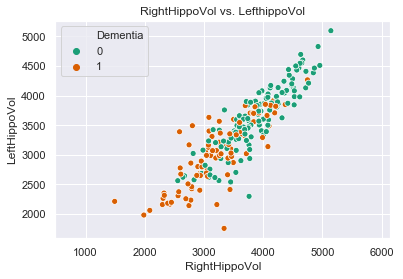

In [3]:
ax = sns.scatterplot(x = "RightHippoVol", y = "LeftHippoVol", data = df, hue = "Dementia")
ax.axis("equal")
ax.set_title("RightHippoVol vs. LefthippoVol")
plt.show()

**Based on the $2d$ scatterplot, there is a separation between the healthy and dementia classes - most of the dementia data lie on the lower left side of the plot, whereas the majority of the healthy data lie on the upper right side of the plot.**

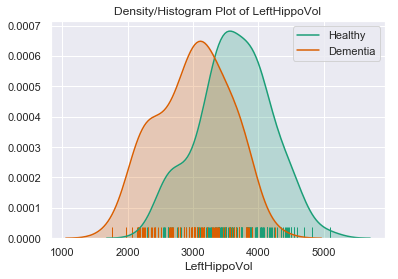

In [6]:
# This groups the data into three dataframes, one for each species
grouped = df.groupby("Dementia")

# Pull out the column (1d array) of the petal length for each group
left_healthy = grouped.get_group(0)["LeftHippoVol"]
left_dementia = grouped.get_group(1)["LeftHippoVol"]

# The 'distplot' function plots a density estimate and histogram by default
sns.distplot(left_healthy, hist = False, rug = True, kde_kws = {'shade': True}, label = "Healthy")
sns.distplot(left_dementia, hist = False, rug = True, kde_kws = {'shade': True}, label = "Dementia")


plt.title("Density/Histogram Plot of LeftHippoVol")
plt.show()

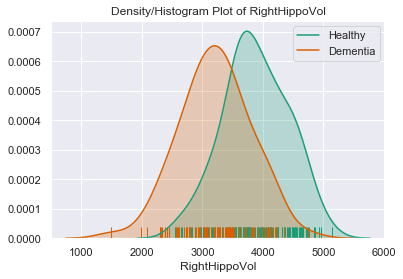

In [7]:
# This groups the data into three dataframes, one for each species
grouped = df.groupby("Dementia")

# Pull out the column (1d array) of the petal length for each group
right_healthy = grouped.get_group(0)["RightHippoVol"]
right_dementia = grouped.get_group(1)["RightHippoVol"]

# The 'distplot' function plots a density estimate and histogram by default
sns.distplot(right_healthy, hist = False, rug = True, kde_kws = {'shade': True}, label = "Healthy")
sns.distplot(right_dementia, hist = False, rug = True, kde_kws = {'shade': True}, label = "Dementia")


plt.title("Density/Histogram Plot of RightHippoVol")
plt.show()

In [176]:
import numpy as np
import math
import scipy as sp
import pandas as pd



data = df.groupby(['TrainData','Dementia'])
# print(data.groups)
hl = data.get_group((1,0))['LeftHippoVol']
hr = data.get_group((1,0))['RightHippoVol']
dl = data.get_group((1,1))['LeftHippoVol']
dr = data.get_group((1,1))['RightHippoVol']

hl_mean = np.mean(hl)
hr_mean = np.mean(hr)
dl_mean = np.mean(dl)
dr_mean = np.mean(dr)
hl_sd = np.std(hl)
hr_sd = np.std(hr)
dl_sd = np.std(dl)
dr_sd = np.std(dr)


#  likelihood of healthy = pdf(x, mean(left healthy) , sd(left healthy) ) 
# * pdf(x, mean(right healthy), sd(right healthy))
# likelihood dementia > likelihood healthy then classify as dementia

trainData = df.loc[df['TrainData'] == 0]
n = len(trainData)
# print(n)
correct = 0
index = trainData.index.values
for x in index:
    likelyHealthy = sp.stats.norm.pdf(trainData.loc[x,'LeftHippoVol'], hl_mean,hl_sd) * sp.stats.norm.pdf(trainData.loc[x,'RightHippoVol'], hr_mean,hr_sd)
    likelyDementia = sp.stats.norm.pdf(trainData.loc[x,'LeftHippoVol'], dl_mean,dl_sd) * sp.stats.norm.pdf(trainData.loc[x,'RightHippoVol'], dr_mean,dr_sd)
    if likelyHealthy > likelyDementia:
        if df.iloc[x]["Dementia"]==0:
            correct = correct+1
    else:
        if df.iloc[x]["Dementia"]==1:
            correct = correct+1

acc = correct/n*100
print (correct, "dignoses out of a total of",n,"tests were accurate.")
print("Accuracy is: ", acc, " %.")
        






82 dignoses out of a total of 113 tests were accurate
Accuracy is:  72.56637168141593  %.
